In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
width = x_train.shape[-2]
height = x_train.shape[-1]
n_features = width * height

latent_dim = 32 

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='linear'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(n_features, activation='sigmoid'),
      layers.Reshape((width, height))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - val_loss: 0.0162
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0144 - val_loss: 0.0137
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0128 - val_loss: 0.0128
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0125 - val_loss: 0.0127
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0125 - val_loss: 0.0126
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

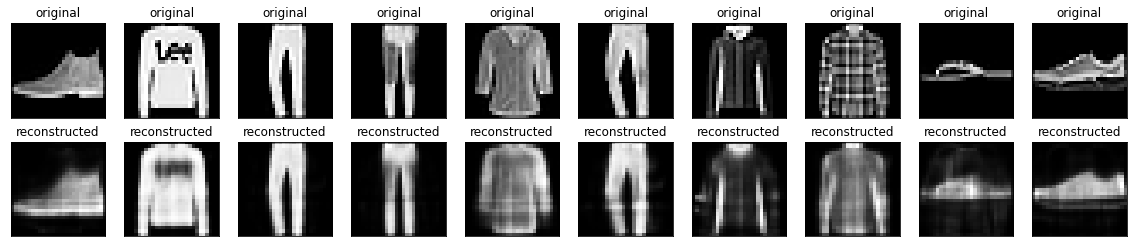

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()